# Collect Data


In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import os
os.listdir('data/CSV')

['README.md', 'vn_news_223_tdlfr.csv', 'vn_news_226_tlfr.csv']

In [527]:
#df = pd.read_csv('/content/drive/Shareddrives/real/Big Data/data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

df = pd.read_csv('data/CSV/vn_news_223_tdlfr.csv')
df.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [530]:
# check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB
None


# Visualization

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
# run this again if iplot doesn't display
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

Số lượng tin trong dữ liệu: 223 

label
0    123
1    100
dtype: int64 



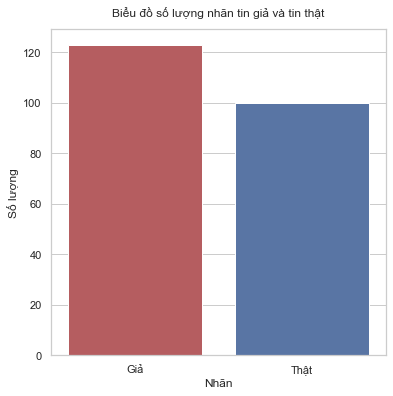

In [531]:
# Count of each label
label_count = df.value_counts('label')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=['Giả', 'Thật'], y=label_count, palette=['r', 'b'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng nhãn tin giả và tin thật', y=1.02) # y = space from graph
print('Số lượng tin trong dữ liệu:', len(df['label']), '\n')
print(label_count, '\n')

Tổng số lượng các tên miền: 29 

domain
vnexpress.net              73
tinvn.info                 68
dantri.com.vn              14
thethao.tuoitre.vn         10
news.zing.vn                7
thoibao.today               6
tuoitre.vn                  5
tintucqpvn.net              5
thanhnien.vn                5
kinhdoanh.vnexpress.net     3
phapluat.news               3
doisong.vnexpress.net       2
thegioitre.vn               2
giadinhtiepthi.com          2
giaitri.vnexpress.net       2
ipick.vn                    2
thoibao.de                  2
vietgiaitri.com             1
baonuocmy.com               1
binhluan.biz                1
sorry.vn                    1
suckhoe.vnexpress.net       1
dulich.vnexpress.net        1
sohoa.vnexpress.net         1
baoangiang.com.vn           1
laodong.vn                  1
haiduong.tintuc.vn          1
gioitreviet.net             1
autoxe.net                  1
dtype: int64 



"domain_count.iplot(\n    kind='barh',\n    xTitle='Số từ',\n    yTitle='Số tin tức',\n    linecolor='black',\n    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',\n    color='red')"

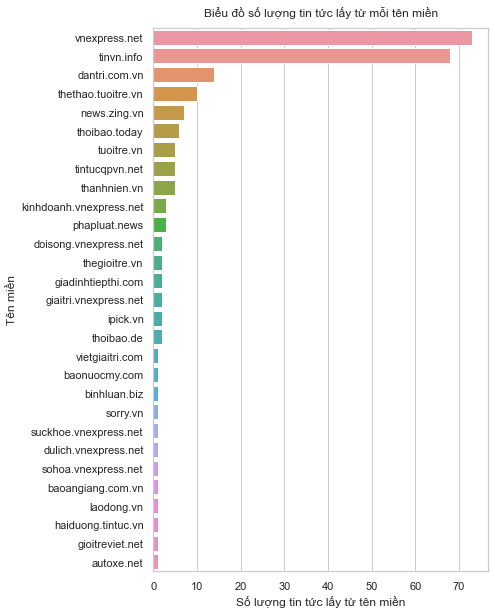

In [532]:
# clean domain names, since there are things like http://zing.news.vn/ and zing.news.vn which are the same thing
for i in range(len(df['domain'])):
    df.at[i, 'domain'] = re.sub(r'www.|/|https:|http:', '', df['domain'][i])

# Count of each domain names
domain_count = df.value_counts('domain')

plt.figure(figsize=(6, 10))
sns.barplot(x=domain_count, y=domain_count.index)
plt.xlabel('Số lượng tin tức lấy từ tên miền')
plt.ylabel('Tên miền')
plt.title('Biểu đồ số lượng tin tức lấy từ mỗi tên miền', y=1.01) # y = space from graph

print('Tổng số lượng các tên miền:', len(set(df['domain'])), '\n')
print(domain_count, '\n')

'''domain_count.iplot(
    kind='barh',
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',
    color='red')'''

Text(0.5, 1.0, 'Biểu đồ số lượng từ trong tin thật và giả')

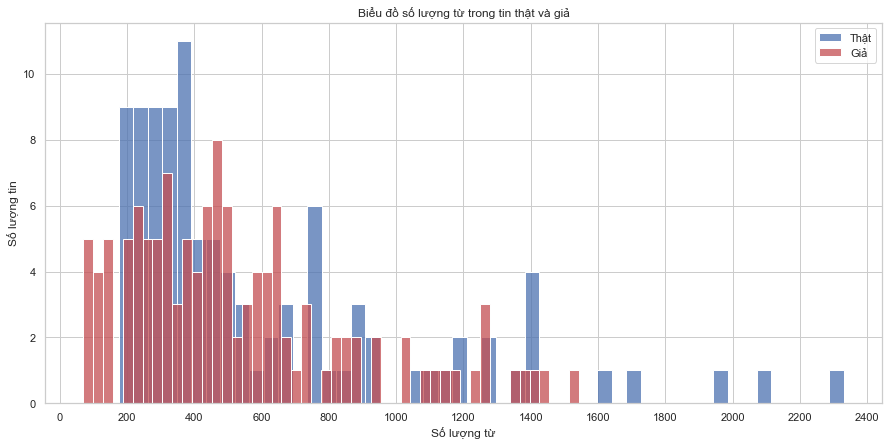

In [533]:
# for graphing
len_true = [len(n.split()) for n in df[df['label'] == 1]['text']]
len_fake = [len(n.split()) for n in df[df['label'] == 0]['text']]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true, bins=50, color='b')
sns.histplot(data=len_fake, bins=50, color='r')
plt.xticks(ticks=range(0, 2500, 200))
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ trong tin thật và giả')

# Pre-processing

In [534]:
from underthesea import word_tokenize
import itertools
import string

In [535]:
# get stopwords list
f = open('data/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords = f.read().split('\n')

In [536]:
print(stopwords[:50])

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán']


In [591]:
# remove stopwords in news text
def clean_stopwords(text_list):
  ''' sent_list: already tokenized text in list type
  '''
  clean_text = []
  for word in text_list:
    if word not in stopwords:
      clean_text.append(word.lower())
  return clean_text

In [538]:
def normalize(text):
  text = re.sub(r'[^\w\s]', '', text) # clean normal punctuation
  text = re.sub(r'_', '', text) # clean weird underscore in text (_like this)
  text = re.sub(r'http\w+', '', text) # clean url link text
  text = word_tokenize(text.lower()) #tokenize, word segment
  return clean_stopwords(text)

In [539]:
# tokenize, clean stopwords and separate fake and true news
true_news = [normalize(n) for n in df[df['label'] == 1]['text']]
fake_news = [normalize(n) for n in df[df['label'] == 0]['text']]

Text(0.5, 1.0, 'Biểu đồ số lượng từ sau khi xử lý trong tin thật và giả')

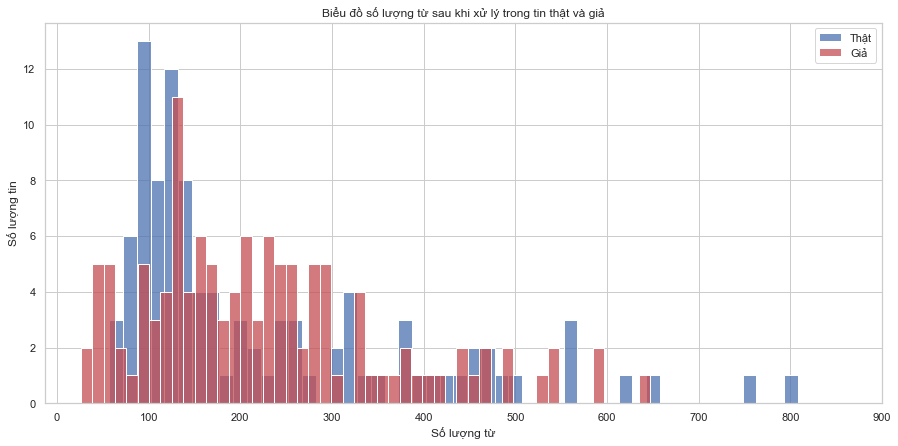

In [540]:
# for graphing
len_true_clean = [len(n) for n in true_news]
len_fake_clean = [len(n) for n in fake_news]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true_clean, bins=50, color='b')
sns.histplot(data=len_fake_clean, bins=50, color='r')
plt.xticks(ticks=range(0, 1000, 100))
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ sau khi xử lý trong tin thật và giả')

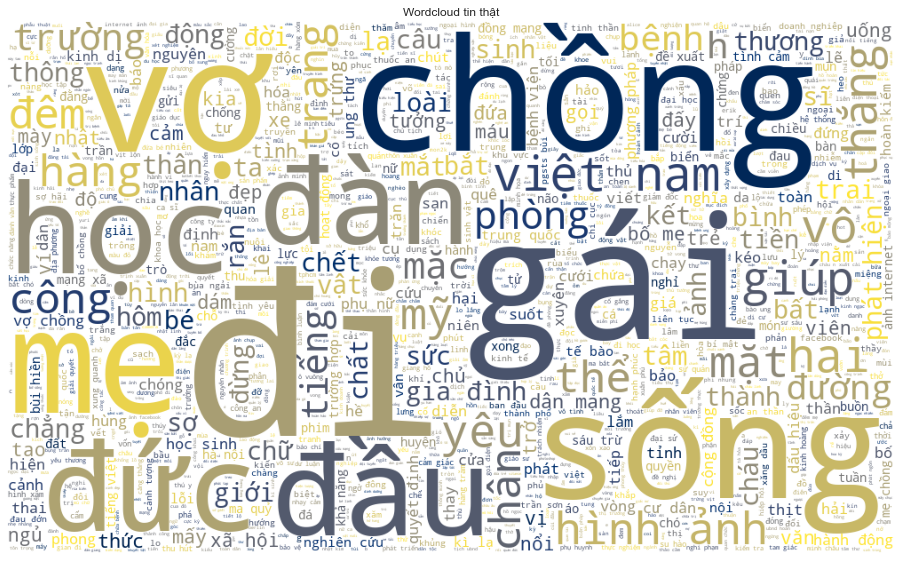

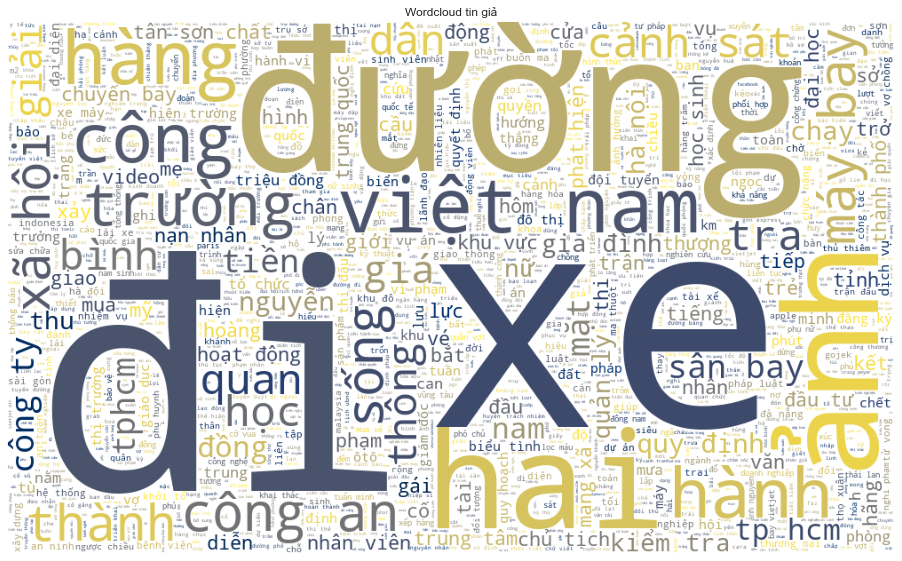

In [496]:
from wordcloud import WordCloud, ImageColorGenerator

# True news
true_news_flatten = list(itertools.chain(*true_news))

plt.figure(figsize = (35, 35))
wc1 = WordCloud(background_color='white', colormap='cividis_r', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(true_news_flatten))
plt.subplot(1, 2, 1)
plt.title('Wordcloud tin thật')
plt.axis("off")
plt.imshow(wc1)

# Fake news
fake_news_flatten = list(itertools.chain(*fake_news))
plt.figure(figsize = (35, 35))
wc0 = WordCloud(background_color='white', colormap='cividis', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(fake_news_flatten))
plt.subplot(1, 2, 2)
plt.title('Wordcloud tin giả')
plt.axis("off")
plt.imshow(wc0)

In [497]:
from collections import Counter

counter_true = Counter()
counter_true.update(true_news_flatten)
counter_fake = Counter()
counter_fake.update(fake_news_flatten)

Text(0.5, 1.0, 'Các từ xuất hiện nhiều nhất trong tin giả')

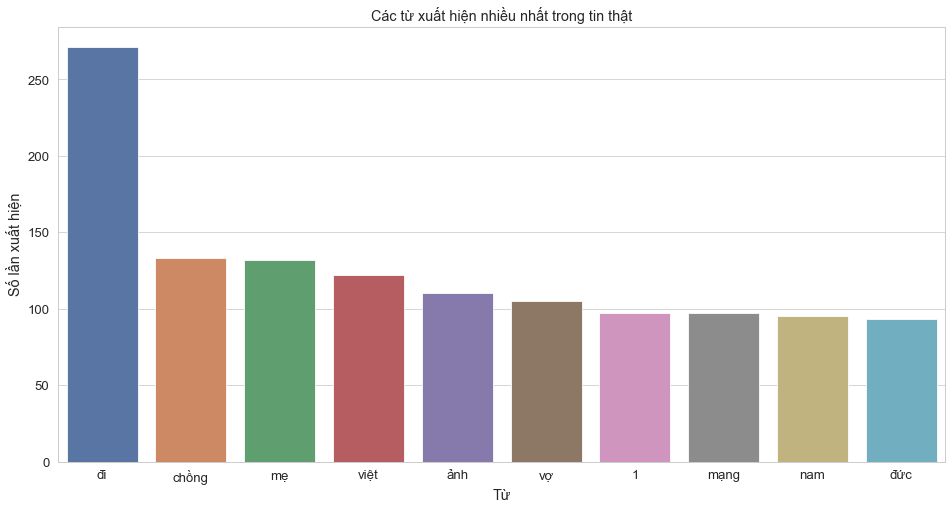

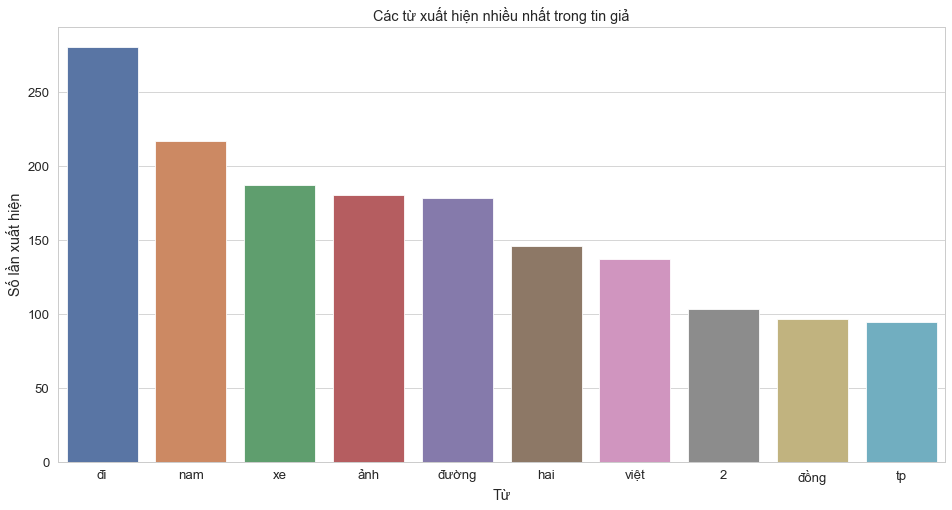

In [566]:
# for graphing, top ten words commonly used in true news
key = [word[0] for word in counter_true.most_common(10)]
value = [word[1] for word in counter_true.most_common(10)]

plt.figure(figsize=(35, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=key, y=value)
sns.set_context('paper', font_scale=1.5)
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Các từ xuất hiện nhiều nhất trong tin thật')

# for graphing, top ten words commonly used in fake news
key = [word[0] for word in counter_fake.most_common(10)]
value = [word[1] for word in counter_fake.most_common(10)]

plt.figure(figsize=(35, 8))
plt.subplot(1, 2, 2)
sns.barplot(x=key, y=value)
sns.set_context('paper', font_scale=1.5)
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Các từ xuất hiện nhiều nhất trong tin giả')

In [500]:
'''
1. clean domain names (done)
2. encode domain names?
3. xử lý text
    check missing or too trash (done)
    clean, filer (regex) on some part if needed (done)
    tokenize(done), worvd segment(done), remove stopwords?(done), remove numerical tokens?, group same tokens? -> check again if too short text data remains-> remove from data?
    word embedding: tfidf?, word2vec...?
'''

'\n1. clean domain names (done)\n2. encode domain names?\n3. xử lý text\n    check missing or too trash (done)\n    clean, filer (regex) on some part if needed (done)\n    tokenize(done), worvd segment(done), remove stopwords?(done), remove numerical tokens?, group same tokens? -> check again if too short text data remains-> remove from data?\n    word embedding: tfidf?, word2vec...?\n'

In [571]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=normalize, ngram_range=(1, 2)) #preprocessor=' '.join)
X = vectorizer.fit_transform(df['text'])
y = np.array(df['label'])

In [572]:
print('Số lượng các từ khác nhau:', len(vectorizer.vocabulary_))
vectorizer.vocabulary_ # distinct words list and its ID

Số lượng các từ khác nhau: 48506


{'thủ tướng': 35108,
 'abe': 2274,
 'cúi': 9198,
 'đầu': 46406,
 'xin lỗi': 42590,
 'hành động': 15636,
 'phi': 27838,
 'thể thao': 34758,
 'tuyển': 38082,
 'nhật': 26400,
 'sankei': 30771,
 'sports': 31109,
 'shinzo': 30877,
 'công khai': 8933,
 'gửi': 14006,
 'hoàng': 14976,
 'toàn bộ': 36008,
 'dân': 11171,
 'tinh thần': 35378,
 'thi đấu': 33014,
 'đội tuyển': 47593,
 'world': 42257,
 'cup': 8360,
 '2018': 958,
 'tối qua': 39670,
 'lượt': 21017,
 'trận': 37487,
 'vòng': 41095,
 'bảng': 4253,
 'chỉ số': 7264,
 'phụ': 28963,
 'senegal': 30835,
 'đội': 47553,
 'thua': 33335,
 'colombia': 8079,
 'fairplay': 12130,
 'thẻ': 34617,
 'phạt': 28771,
 'võ sĩ đạo': 41273,
 'samurai': 30750,
 'thượng võ': 34268,
 'chỉ trích': 7271,
 'bất bình': 4382,
 'toàn': 36006,
 'hình ảnh': 15879,
 'kiên cường': 18785,
 'đấu trường': 46347,
 'quốc tế': 30047,
 'đứng': 47932,
 'thành': 33465,
 'trách nhiệm': 36788,
 'gửi lời': 14019,
 'sâu sắc': 31486,
 'nhân dân': 26054,
 'nổi tiếng': 27346,
 'chất': 6924,

In [573]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Tập train:', len(y_train), '\n\tSố nhãn tin thật:', len([i for i in y_train if i==1]), '\n\tSố nhãn tin giả:', len([i for i in y_train if i==0]), '\n')
print('Tập test:', len(y_test), '\n\tSố nhãn tin thật:', len([i for i in y_test if i==1]), '\n\tSố nhãn tin giả:', len([i for i in y_test if i==0]))

Tập train: 178 
	Số nhãn tin thật: 82 
	Số nhãn tin giả: 96 

Tập test: 45 
	Số nhãn tin thật: 18 
	Số nhãn tin giả: 27


In [409]:
'''def handle_unknown_token(text):
  text = normalize(text)
  print(text)
  for i in range(len(text)):
    if text[i] not in vectorizer.get_feature_names():
      text[i] = 'UNK'
  return text'''

# Model

In [242]:
# add random forest, xgb

In [504]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [505]:
def decision_tree(X_train, y_train, X_test):
  tree = DecisionTreeClassifier(random_state=0)
  tree.fit(X_train, y_train)
  y_pred_tree = tree.predict(X_test)
  return y_pred_tree

In [506]:
def logistic_regression(X_train, y_train, X_test):
  clf_lore = LogisticRegression(random_state=0, max_iter=1000)
  clf_lore.fit(X_train, y_train)
  y_pred_lore = clf_lore.predict(X_test)
  return y_pred_lore

In [507]:
def knn(X_train, y_train, X_test):
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)
  y_pred_neigh = neigh.predict(X_test)
  return y_pred_neigh

In [508]:
def naive_bayes(X_train, y_train, X_test):
  nb = MultinomialNB()
  nb.fit(X_train, y_train)
  y_pred_nb = nb.predict(X_test)
  return y_pred_nb

In [509]:
def svc(X_train, y_train, X_test):
  clf_svc = svm.SVC(kernel='linear')
  clf_svc.fit(X_train, y_train)
  y_pred_svc = clf_svc.predict(X_test)
  return y_pred_svc

In [510]:
def random_forest(X_train, y_train, X_test):
  clf_rf = RandomForestClassifier(random_state=0) # X_train, y_train, X_test
  clf_rf.fit(X, y)
  y_pred_rf = clf_rf.predict(X_test)
  return y_pred_rf

In [577]:
pred_tree = decision_tree(X_train, y_train, X_test)
pred_lore = logistic_regression(X_train, y_train, X_test)
pred_knn = knn(X_train, y_train, X_test)
pred_nb = naive_bayes(X_train, y_train, X_test)
pred_svc = svc(X_train, y_train, X_test)
pred_rf = random_forest(X_train, y_train, X_test)

In [578]:
print('Decision Tree')
print(classification_report(pred_tree, y_test))
tree_acc = accuracy_score(pred_tree, y_test)
print('Accuracy:', tree_acc)

Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.78      0.70      0.74        20

    accuracy                           0.78        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.78      0.78      0.78        45

Accuracy: 0.7777777777777778


In [579]:
print('Random Forest')
print(classification_report(pred_rf, y_test))
rf_acc = accuracy_score(pred_rf, y_test)
print(rf_acc)

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


In [580]:
print('Logistic Regression')
print(classification_report(pred_lore, y_test))
lore_acc = accuracy_score(pred_lore, y_test)
print(lore_acc)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        35
           1       0.56      1.00      0.71        10

    accuracy                           0.82        45
   macro avg       0.78      0.89      0.79        45
weighted avg       0.90      0.82      0.84        45

0.8222222222222222


In [581]:
print('K-nearest-neighbor')
print(classification_report(pred_knn, y_test))
knn_acc = accuracy_score(pred_knn, y_test)
print(knn_acc)

K-nearest-neighbor
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.94      0.81      0.87        21

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.90      0.89      0.89        45

0.8888888888888888


In [582]:
print('Multinomial Naive Bayes')
print(classification_report(pred_nb, y_test))
nb_acc = accuracy_score(pred_nb, y_test)
print(nb_acc)

Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

0.8888888888888888


In [583]:
print('Support Vector Machines')
print(classification_report(pred_svc, y_test))
svc_acc = accuracy_score(pred_svc, y_test)
print(svc_acc)

Support Vector Machines
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.86      0.92        21

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


# Evaluation

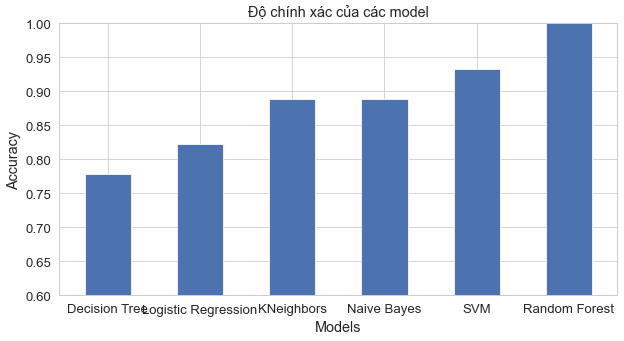

In [584]:
models= ['Decision Tree', 'Logistic Regression', 'KNeighbors', 'Naive Bayes', 'SVM', 'Random Forest']
accuracy= [tree_acc, lore_acc, knn_acc, nb_acc, svc_acc, rf_acc]

fig = plt.figure(figsize = (10, 5))
plt.bar(models,accuracy,width=0.5)
plt.ylim([0.6, 1])
plt.title("Độ chính xác của các model")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Different Approach

In [585]:
# different feature extractrue_newstion

In [586]:
''' features:
1. number of total tokens V
2. number of punctuation V
3. number of tokens is full CAPITAL V
4. number of tokens contains any CAPITAL character V 
5. distinct words V
6. number of numerical type token V
7. news topic (subject) using underthesea text classification (not good)
8. number of stopwords detected V
9. number of Noun pos tag? V
10. V pos tag? V
11. A pos tag V
12. number of tokens with 1 word?
13. number of tokens with 2 words?
14. number of tokens with >=3 words?

'''

' features:\n1. number of total tokens V\n2. number of punctuation V\n3. number of tokens is full CAPITAL V\n4. number of tokens contains any CAPITAL character V \n5. distinct words V\n6. number of numerical type token V\n7. news topic (subject) using underthesea text classification (not good)\n8. number of stopwords detected V\n9. number of Noun pos tag? V\n10. V pos tag? V\n11. A pos tag V\n12. number of tokens with 1 word?\n13. number of tokens with 2 words?\n14. number of tokens with >=3 words?\n\n'

In [587]:
from underthesea import pos_tag

def extract_feature(text):  
  #count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
  #num_punct = count(text, string.punctuation) 
  num_punct = len([k for k in word_tokenize(text) if k in string.punctuation])

  
  text = text.translate(str.maketrans('', '', string.punctuation)) # clean punctuation to not affect other words tokenizing
  
  num_one, num_two, num_three_gtt, num_numbers, num_stopwords, num_upper, num_any_upper, num_N , num_V, num_A= ([] for i in range(10))
  tokens = pos_tag(text)
  num_distinct = set()
  #print(tokens)
  
  for token, tag in tokens:
    
    if len(token.split()) == 1:
      num_one.append(token)
    elif len(token.split()) == 2:
      num_two.append(token)
    else:
      num_three_gtt.append(token)
      
    if token.isnumeric(): 
      num_numbers.append(token)

    if token in stopwords:
      num_stopwords.append(token)
      
    if token.isupper():
      num_upper.append(token)
      
    if any(char.isupper() for char in token): 
      num_any_upper.append(token)
      
    if tag == 'N':
      num_N.append(token)
      
    if tag == 'A':
      num_A.append(token)
      
    if tag == 'V':
      num_V.append(token)
      
    num_distinct.add(token.lower())
      
    
  
  features = [len(tokens), # number of total word tokens (without punctuation)
              num_punct, # number of punctuation
              len(num_one), # number of 1 word tokens
              len(num_two), # number of 2 words tokens
              len(num_three_gtt), # number of >=3 words tokens
              len(num_numbers), # number of token that is numeric
              len(num_stopwords), # number of token that is a stopword
              len(num_upper), # number of token that is in full CAPITAL
              len(num_any_upper), # number of token that contains any CAPITAL character
              len(num_distinct), # number of distinct tokens
              len(num_N), # number of Noun (N) tag tokens
              len(num_A), # number of Adjective (A) tag tokens
              len(num_V), # number of Verb (V) tag tokens
             ] 
  return features

extract_feature(sent)

[14, 8, 9, 4, 1, 2, 2, 1, 4, 14, 6, 0, 2]

In [588]:
# tokenize, clean stopwords and separate fake and true news
true_news2 = [extract_feature(n) for n in df[df['label'] == 1]['text']]
fake_news2 = [extract_feature(n) for n in df[df['label'] == 0]['text']]

In [590]:
print(true_news[0])
true_news2[0]

['thủ tướng', 'abe', 'cúi', 'đầu', 'xin lỗi', 'hành động', 'phi', 'thể thao', 'tuyển', 'nhật', 'sankei', 'sports', 'thủ tướng', 'nhật', 'shinzo', 'abe', 'công khai', 'gửi', 'xin lỗi', 'nhật', 'hoàng', 'toàn bộ', 'dân', 'tinh thần', 'thi đấu', 'phi', 'thể thao', 'đội tuyển', 'nhật', 'world', 'cup', '2018', 'tối qua', 'lượt', 'trận', 'vòng', 'bảng', 'world', 'cup', '2018', 'nhật', 'chỉ số', 'phụ', 'senegal', 'đội', 'thua', 'colombia', 'nhật', 'vòng', 'chỉ số', 'fairplay', 'thẻ', 'phạt', 'thủ tướng', 'nhật', 'shinzo', 'abe', 'cúi', 'đầu', 'xin lỗi', 'tinh thần', 'võ sĩ đạo', 'samurai', 'đội tuyển', 'nhật', 'hành động', 'tinh thần', 'thượng võ', 'thi đấu', 'world', 'cup', 'chỉ trích', 'bất bình', 'toàn', 'dân', 'hình ảnh', 'kiên cường', 'dân', 'nhật', 'đấu trường', 'quốc tế', 'đứng', 'đầu', 'thành', 'trách nhiệm', 'gửi lời', 'xin lỗi', 'sâu sắc', 'nhân dân', 'abe', 'cúi', 'đầu', 'trách nhiệm', 'nhật', 'nổi tiếng', 'tinh thần', 'trách nhiệm', 'chất', 'võ sĩ đạo', 'đội tuyển', 'áo', 'xanh', 

[384, 54, 280, 99, 5, 14, 153, 6, 66, 212, 122, 19, 90]

In [520]:
X = true_news2 + fake_news2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [521]:
pred2_tree = decision_tree(X_train, y_train, X_test)
pred2_lore = logistic_regression(X_train, y_train, X_test)
pred2_knn = knn(X_train, y_train, X_test)
pred2_nb = naive_bayes(X_train, y_train, X_test)
pred2_svc = svc(X_train, y_train, X_test)
pred2_rf = random_forest(X_train, y_train, X_test)

In [119]:
print(classification_report(pred2_tree, y_test))
print(accuracy_score(pred2_tree, y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.67      0.67      0.67        18

    accuracy                           0.73        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.73      0.73      0.73        45

0.7333333333333333


In [120]:
print(classification_report(pred2_rf, y_test))
print(accuracy_score(pred2_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


In [121]:
print(classification_report(pred2_lore, y_test))
print(accuracy_score(pred2_lore, y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


In [122]:
print(classification_report(pred2_knn, y_test))
print(accuracy_score(pred2_knn, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

0.8888888888888888


In [123]:
print(classification_report(pred2_nb, y_test))
print(accuracy_score(pred2_nb, y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.83      0.79      0.81        19

    accuracy                           0.84        45
   macro avg       0.84      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45

0.8444444444444444


In [124]:
print(classification_report(pred2_svc, y_test))
print(accuracy_score(pred2_svc, y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.89      0.89      0.89        18

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

0.9111111111111111


In [525]:
print('Decision Tree')
tree_acc2 = accuracy_score(pred2_tree, y_test)
print(classification_report(pred2_tree, y_test), 'Accuracy:', tree_acc2, '\n')

print('Random Forest')
rf_acc2 = accuracy_score(pred2_rf, y_test)
print(classification_report(pred2_rf, y_test), 'Accuracy:', rf_acc2, '\n')

print('Logistic Regression')
lore_acc2 = accuracy_score(pred2_lore, y_test)
print(classification_report(pred2_lore, y_test), 'Accuracy:', lore_acc2, '\n')

print('K-nearest-neighbor')
knn_acc2 = accuracy_score(pred2_knn, y_test)
print(classification_report(pred2_knn, y_test), 'Accuracy:', knn_acc2, '\n')

print('Multinomial Naive Bayes')
nb_acc2 = accuracy_score(pred2_nb, y_test)
print(classification_report(pred2_nb, y_test), 'Accuracy:', nb_acc2, '\n')

print('Support Vector Machines')
svc_acc2 = accuracy_score(pred2_svc, y_test)
print(classification_report(pred2_svc, y_test), 'Accuracy:', svc_acc2, '\n')

Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.67      0.59      0.62        17

    accuracy                           0.74        46
   macro avg       0.72      0.71      0.71        46
weighted avg       0.73      0.74      0.74        46
 Accuracy: 0.7391304347826086 

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        15

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46
 Accuracy: 1.0 

Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       0.73      0.55      0.63        20

    accuracy                           0.72        46
   macro avg       0.72      0.70

# Detection

In [45]:
# not done
def detect(text):
  text = normalize(text)
  text = extract_feature(text)
  print(text)
  pred = tree.predict(text)
  return pred